In [7]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\sumed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [10]:
patients = pd.DataFrame({
    "patient_id": ["P1","P2","P3","P4"],
    "age": [45,32,60,25],
    "gender": ["M","F","M","F"],
    "insurance": ["Private","Government","Private","Private"],
    "branch": ["Hyderabad","Bangalore","Chennai","Hyderabad"]
})
patients


,patient_id,age,gender,insurance,branch
0,P1,45,M,Private,Hyderabad
1,P2,32,F,Government,Bangalore
2,P3,60,M,Private,Chennai
3,P4,25,F,Private,Hyderabad


In [12]:
admissions = pd.DataFrame({
    "admission_id": ["A1","A2","A3","A4"],
    "patient_id": ["P1","P2","P3","P4"],
    "department": ["Cardiology","Orthopedics","General Medicine","Emergency"],
    "admit_date": pd.to_datetime(["2024-01-01","2024-01-02","2024-01-03","2024-01-03"]),
    "discharge_date": pd.to_datetime(["2024-01-06","2024-01-05","2024-01-10","2024-01-04"]),
    "emergency": ["No","No","Yes","Yes"]
})
admissions


,admission_id,patient_id,department,admit_date,discharge_date,emergency
0,A1,P1,Cardiology,2024-01-01,2024-01-06,No
1,A2,P2,Orthopedics,2024-01-02,2024-01-05,No
2,A3,P3,General Medicine,2024-01-03,2024-01-10,Yes
3,A4,P4,Emergency,2024-01-03,2024-01-04,Yes


In [13]:
doctors = pd.DataFrame({
    "doctor_id": ["D1","D2","D3"],
    "department": ["Cardiology","Orthopedics","General Medicine"],
    "available_hours": [40,40,40],
    "booked_hours": [34,26,38]
})
doctors


,doctor_id,department,available_hours,booked_hours
0,D1,Cardiology,40,34
1,D2,Orthopedics,40,26
2,D3,General Medicine,40,38


In [15]:
billing = pd.DataFrame({
    "patient_id": ["P1","P2","P3","P4"],
    "room_cost": [30000,15000,25000,10000],
    "procedure_cost": [35000,18000,20000,5000],
    "medicine_cost": [15000,7000,15000,4000]
})
billing["total_cost"] = billing[["room_cost", "procedure_cost", "medicine_cost"]].sum(axis=1)
billing


,patient_id,room_cost,procedure_cost,medicine_cost,total_cost
0,P1,30000,35000,15000,80000
1,P2,15000,18000,7000,40000
2,P3,25000,20000,15000,60000
3,P4,10000,5000,4000,19000


In [16]:
outcomes = pd.DataFrame({
    "patient_id": ["P1","P2","P3","P4"],
    "outcome": ["Recovered","Improved","Recovered","Transferred"],
    "readmitted": ["No","No","Yes","No"]
})
outcomes


,patient_id,outcome,readmitted
0,P1,Recovered,No
1,P2,Improved,No
2,P3,Recovered,Yes
3,P4,Transferred,No


In [17]:
admissions["length_of_stay"] = (admissions["discharge_date"] - admissions["admit_date"]).dt.days
alos = admissions["length_of_stay"].mean()
print("Average Length of Stay:", alos)


Average Length of Stay: 4.0


In [18]:
readmission_rate = (outcomes["readmitted"] == "Yes").mean() * 100
print("Readmission Rate:", readmission_rate, "%")


Readmission Rate: 25.0 %


In [19]:
doctors["utilization"] = doctors["booked_hours"] / doctors["available_hours"] * 100
doctors

,doctor_id,department,available_hours,booked_hours,utilization
0,D1,Cardiology,40,34,85.0
1,D2,Orthopedics,40,26,65.0
2,D3,General Medicine,40,38,95.0


In [20]:
admissions["emergency"].value_counts()


emergency
No     2
Yes    2
Name: count, dtype: int64

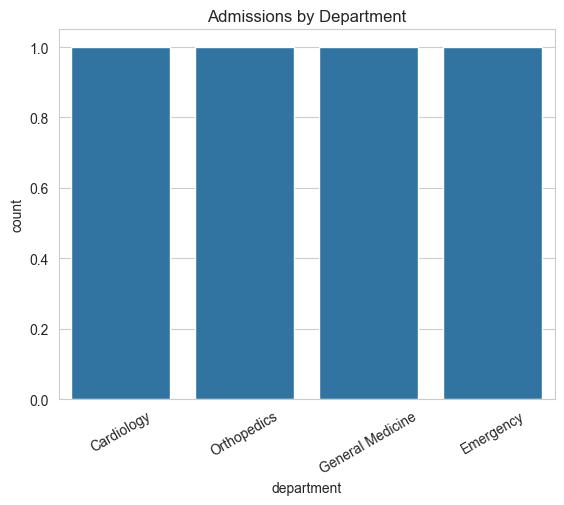

In [21]:
sns.countplot(data=admissions, x="department")
plt.title("Admissions by Department")
plt.xticks(rotation=30)
plt.show()


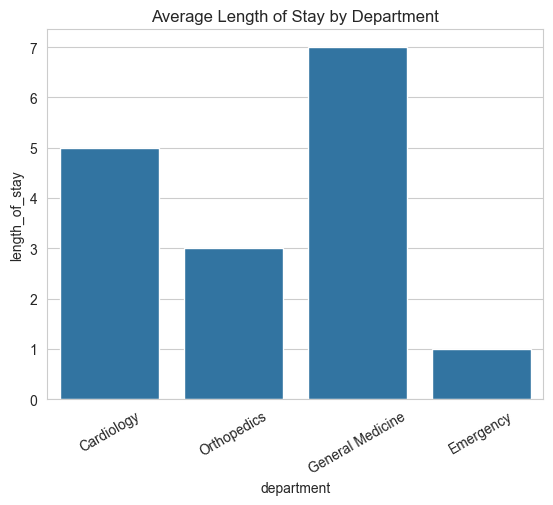

In [22]:
sns.barplot(data=admissions, x="department", y="length_of_stay")
plt.title("Average Length of Stay by Department")
plt.xticks(rotation=30)
plt.show()


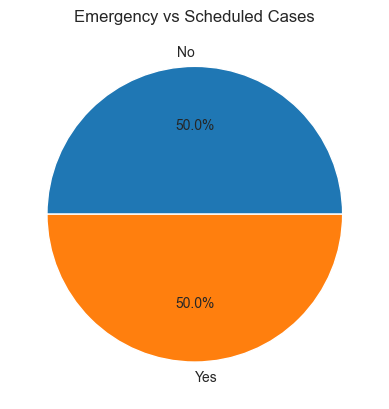

In [23]:
admissions["emergency"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Emergency vs Scheduled Cases")
plt.ylabel("")
plt.show()


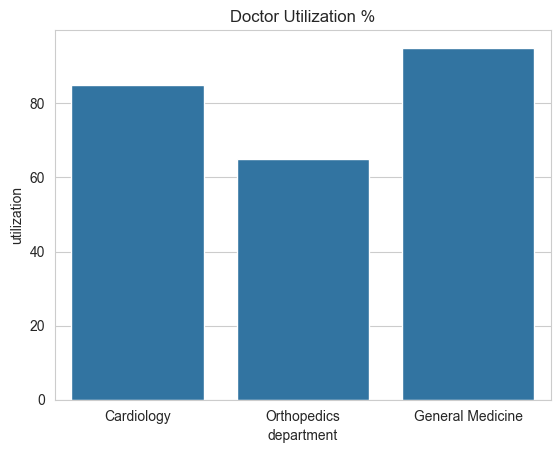

In [24]:
sns.barplot(data=doctors, x="department", y="utilization")
plt.title("Doctor Utilization %")
plt.show()


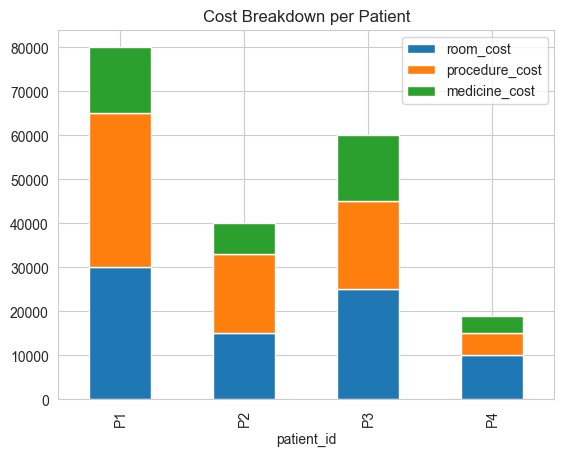

In [25]:
billing.set_index("patient_id")[["room_cost","procedure_cost","medicine_cost"]].plot(kind="bar", stacked=True)
plt.title("Cost Breakdown per Patient")
plt.show()


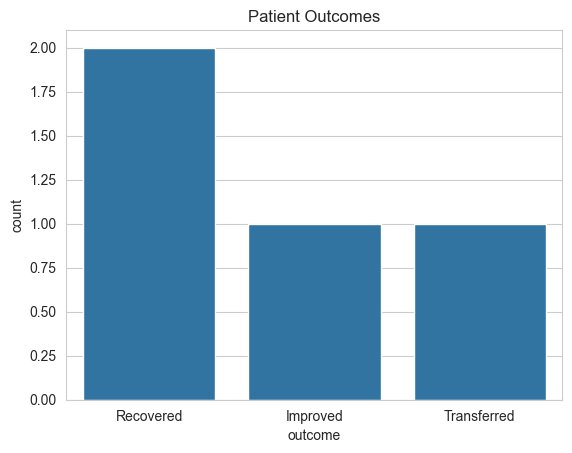

In [26]:
sns.countplot(data=outcomes, x="outcome")
plt.title("Patient Outcomes")
plt.show()


In [27]:
if doctors["utilization"].max() > 80:
    print("⚠ ALERT: Doctor overload risk")

if alos > 5:
    print("⚠ ALERT: Delayed discharges detected")

if readmission_rate > 20:
    print("⚠ ALERT: High readmission rate")

⚠ ALERT: Doctor overload risk
⚠ ALERT: High readmission rate


In [28]:
patients.to_csv("patients.csv", index=False)
admissions.to_csv("admissions.csv", index=False)
doctors.to_csv("doctors.csv", index=False)
billing.to_csv("billing.csv", index=False)
outcomes.to_csv("outcomes.csv", index=False)
